# Exploratory Data Analysis of ice extension over time

In [182]:
# The magic four
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dates
import datetime

# Plot style and size
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (20,10)

In [184]:
'''Dataset contains measures (in sq km) of the world's ice extension in both northern hemisphere 
   and shouthern hemisphere. Data was collected every day/every 2-3 days from 1978 to 2019'''

# Import dataset

ice = pd.read_csv('seaice.csv', skipinitialspace=True)

## 1 - Initial Data Exploration

In [185]:
ice

,Year,Month,Day,Extent,Missing,Source Data,hemisphere
0,1978,10,26,10.231,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
1,1978,10,28,10.420,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
2,1978,10,30,10.557,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
3,1978,11,1,10.670,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
4,1978,11,3,10.777,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
...,...,...,...,...,...,...,...
26349,2019,5,27,10.085,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,south
26350,2019,5,28,10.078,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,south
26351,2019,5,29,10.219,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,south
26352,2019,5,30,10.363,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,south


In [186]:
# Check the data types of dataset

ice.dtypes

Year             int64
Month            int64
Day              int64
Extent         float64
Missing        float64
Source Data     object
hemisphere      object
dtype: object

In [171]:
# Print a concise summary of the dataset

ice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26354 entries, 0 to 26353
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         26354 non-null  int64  
 1   Month        26354 non-null  int64  
 2   Day          26354 non-null  int64  
 3   Extent       26354 non-null  float64
 4   Missing      26354 non-null  float64
 5   Source Data  26354 non-null  object 
 6   hemisphere   26354 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 1.4+ MB


In [187]:
# Check the number of nulls

ice.isnull().sum()
# there's no nulls

Year           0
Month          0
Day            0
Extent         0
Missing        0
Source Data    0
hemisphere     0
dtype: int64

# DATA CLEANING

In [173]:
# Print a list of the columns of the dataset

list(ice.columns)

['Year', 'Month', 'Day', 'Extent', 'Missing', 'Source Data', 'hemisphere']

In [174]:
# Merge 'Year', 'Month' and 'Day' in the same column 'Date' in order to change to datetime later

cols = ['Year', 'Month', 'Day']
ice['Date'] = ice[cols].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)

In [175]:
# Change the data type of Date to datetime64[ns]

ice['Date'] = pd.to_datetime(ice['Date'], format = '%Y-%m-%d')

In [176]:
# Set 'Date' column in the index

ice.set_index('Date', inplace = True)
ice.sort_index(inplace = True)

In [177]:
# Drop unnecessary columns

ice.drop(columns=['Year', 'Month', 'Day', 'Source Data'], inplace=True)

In [178]:
# Filter rows by hemisphere

north_hemisphere = ice[ice['hemisphere']=='north']
south_hemisphere = ice[ice['hemisphere']=='south']

In [179]:
north_hemisphere

,Extent,Missing,hemisphere
Date,,,
1978-10-26,10.231,0.0,north
1978-10-28,10.420,0.0,north
1978-10-30,10.557,0.0,north
1978-11-01,10.670,0.0,north
1978-11-03,10.777,0.0,north
...,...,...,...
2019-05-27,11.747,0.0,north
2019-05-28,11.672,0.0,north
2019-05-29,11.652,0.0,north


In [180]:
south_hemisphere

,Extent,Missing,hemisphere
Date,,,
1978-10-26,17.624,0.0,south
1978-10-28,17.803,0.0,south
1978-10-30,17.670,0.0,south
1978-11-01,17.527,0.0,south
1978-11-03,17.486,0.0,south
...,...,...,...
2019-05-27,10.085,0.0,south
2019-05-28,10.078,0.0,south
2019-05-29,10.219,0.0,south


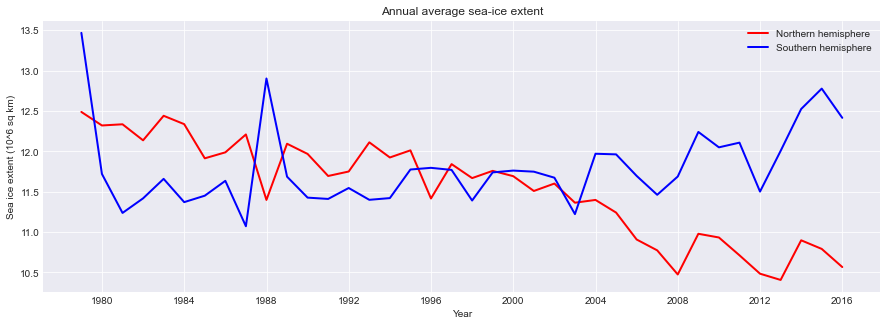

In [183]:
# plot northern and southern hemispheres ice extension

plt.figure(figsize=(15,5))
plt.plot(north_hemisphere['Extent'][:'2015'].resample('Y').mean(), 
         linewidth=2.0 ,
         color='r', 
         label='Northern hemisphere')

plt.plot(south_hemisphere['Extent'][:'2015'].resample('Y').mean(), 
         linewidth=2.0,
         color='b', 
         label='Southern hemisphere')

plt.ylabel('Sea ice extent (10^6 sq km)')
plt.xlabel('Year')
plt.title('Annual average sea-ice extent')
plt.legend()